# Task 4.10 

# Contents 

1. Importing Libraries 
2. Importing Data 
3. Data Privacy (PII)
4. Creating Regions: Northeast, Midwest, South, West 
5. Creating Customer Profiles 
    Age Profile
    Income Profile
    Family Status and Dependents Profile 
    Baby Profile 
    Pet Profile 
    Alcohol Profile
    
6. Creating Department Profiles
    Age Profile
    Income Profile
    Family Status and Dependents Profile 
    Baby Profile 
    Pet Profile 
    Alcohol Profile 
    
7. Comparison Visualizations 
   Region Distributions
   Order Frequency Distributions
   Price Range Distributions
   
8. General Visualizations 
9. Exporting Final Datasets 



# Task 4.10 Part 1 Questions 

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data 

In [2]:
path = r'C:\Users\emily\OneDrive\Documents\Career Foundry 2022\Data Immersion\Achievment 4\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'complete_instacart_data.pkl'))

#Checking Data Consistency 

In [4]:
df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order_placed,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,gender,state,age,date_joined,no_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [5]:
df.shape

(32404859, 32)

# Data Privacy (PII) 

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis. 

Answer: This data contains the first and last name of customers, this data is considered PII. These columns should be dropped from the dataframe to proceed with this anaylsis. 

In [6]:
#Checking columns to identify PII 
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order_placed', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'Most_orders', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_order_frequency', 'frequency_flag',
       'First Name', 'Last Name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependents', 'family_status', 'income'],
      dtype='object')

In [7]:
#Dropping first and last name columns
df = df.drop(columns=['First Name', 'Last Name'])

In [8]:
#Checking for succesfull drop 
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order_placed', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'Most_orders', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_order_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'no_of_dependents', 'family_status',
       'income'],
      dtype='object')

# Creating Regions: Northeast, Midwest, South, West 

3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [9]:
#Creating region lists

northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
#Creating regional flags

df.loc[df['state'].isin(northeast), 'region']='Northeast'
df.loc[df['state'].isin(midwest), 'region']='Midwest'
df.loc[df['state'].isin(south), 'region']='South'
df.loc[df['state'].isin(west), 'region']='West'

In [11]:
#Checking frequency
df['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

3A. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [12]:
#Creating a crosstab to compare region and spending flag
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [13]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [14]:
#Number of states per region
df.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [15]:
#Number of customers per region
df.groupby('region')['user_id'].nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

Answer: The South region has the highest amount of spenders and the lowest amount of spenders. This could be due to the total number of states that are considered the "South Region". This region has a higher number of states, concluding in higher and lower number of spenders. 

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
#Creating exclusion flag for low-activity customers: less than 5 (0) and equal to or more than 5 (1)

df.loc[df['max_order']>=5, 'activity']='1'
df.loc[df['max_order']<5, 'activity']='0'

In [17]:
df['activity'].value_counts(dropna=False)

1    30964564
0     1440295
Name: activity, dtype: int64

In [18]:
#Creating a dataset of customers with orders lower than 5
low_activity = df[df['activity']=='0']

In [19]:
low_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order_placed,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,no_of_dependents,family_status,income,region,activity
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0


In [20]:
#Exporting dataframe of low_activity customers
low_activity.to_pickle(os.path.join(path,'Data','Prepared Data','low_activity_customers.pkl'))

In [21]:
#Deleting low_activity to reduce memory usage
del low_activity

In [22]:
#Creating a dataset of customers with orders equal to or higher than 5
df_active=df[df['activity']=='1']

In [23]:
df_active.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order_placed,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,no_of_dependents,family_status,income,region,activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1


In [24]:
df_active.shape

(30964564, 32)

In [25]:
#Deleting original df to reduce memory usage
del df

# Creating Customer Profiles 

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

### Age Profile 

In [26]:
#Creating age flags for young adult:18-25 years, adult: 26-64 years, seniors: 65+ years
df_active.loc[df_active['age']<=25, 'age_group']='Young Adult'
df_active.loc[(df_active['age']<65)&(df_active['age']>25), 'age_group']='Adult'
df_active.loc[df_active['age']>=65, 'age_group']='Senior'
df_active['age_group'].value_counts()

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [27]:
#Aggregating for age group expenditure
df_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789062  1.0  25.0
Senior       7.796875  1.0  25.0
Young Adult  7.785156  1.0  25.0

In [28]:
#Aggregating for age group order frequency
df_active.groupby('age_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                              mean  min   max
age_group                                    
Adult                     9.968750  0.0  30.0
Senior                    9.929688  0.0  30.0
Young Adult               9.937500  0.0  30.0

### Income Profile 

In [29]:
#Creating income flags: < $40,000- low income, > $40,000 & or = < $150,000-middle income, < $150,000- high income
df_active.loc[df_active['income']<40000, 'income_group']='low income'
df_active.loc[(df_active['income']>=40000)&(df_active['income']<150000), 'income_group']='middle income'
df_active.loc[df_active['income']>150000, 'income_group']='high income'
df_active['income_group'].value_counts(dropna=False)  

middle income    25457264
high income       3894534
low income        1612025
NaN                   741
Name: income_group, dtype: int64

In [30]:
#Aggregating for income bracket expenditure
df_active.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.941406  1.0  25.0
low income     6.503906  1.0  25.0
middle income  7.847656  1.0  25.0

In [31]:
#Aggregating for income bracket order frequency
df_active.groupby('income_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                mean  min   max
income_group                                   
high income                 9.789062  0.0  30.0
low income                 10.648438  0.0  30.0
middle income               9.937500  0.0  30.0

### Number of Dependents Profile 

In [32]:
#Creating dependents flag: no_of_dependents > 0 - has dependents, otherwise - no dependents
df_active.loc[df_active['no_of_dependents']>0, 'dependent_group']='has dependents'
df_active.loc[df_active['no_of_dependents']==0,'dependent_group']='no dependents'
df_active['dependent_group'].value_counts(dropna=False)

has dependents    23224883
no dependents      7739681
Name: dependent_group, dtype: int64

In [33]:
#Aggregating for dependents bracket expenditure
df_active.groupby('dependent_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependent_group                     
has dependents   7.789062  1.0  25.0
no dependents    7.789062  1.0  25.0

In [34]:
#Aggregating for dependents bracket order frequency
df_active.groupby('dependent_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                  mean  min   max
dependent_group                                  
has dependents                9.960938  0.0  30.0
no dependents                 9.937500  0.0  30.0

### Family Status Profile

In [35]:
df_active['family_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [36]:
#Aggregating for family status expenditure
df_active.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.800781  1.0  25.0
living with parents and siblings  7.800781  1.0  25.0
married                           7.789062  1.0  25.0
single                            7.785156  1.0  25.0

In [37]:
#Aggregating for family status order frequency
df_active.groupby('family_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                                   mean  min   max
family_status                                                     
divorced/widowed                               9.875000  0.0  30.0
living with parents and siblings               9.867188  0.0  30.0
married                                        9.968750  0.0  30.0
single                                         9.968750  0.0  30.0

# Creating Department Profiles 

In [38]:
#Importing departments_wrangled.csv
df_dept=pd.read_csv(os.path.join(path,'Data','Prepared Data','departments_wrangled.csv'))

In [39]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [40]:
#Renaming unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [41]:
#Turning df_dept into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [42]:
#Mapping department names to department_id in dataframe
df_active['department'] = df_active['department_id'].map(data_dict)
df_active.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order_placed,product_id,add_to_cart_order,reordered,product_name,...,date_joined,no_of_dependents,family_status,income,region,activity,age_group,income_group,dependent_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages


In [44]:
df_active.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order_placed', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'Most_orders', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_order_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'no_of_dependents', 'family_status',
       'income', 'region', 'activity', 'age_group', 'income_group',
       'dependent_group', 'department'],
      dtype='object')

### Department profiles will be divided by categories that fall under baby supplies, alcohol consumption and pet supplies. 

### Baby Department Profile 

In [45]:
#Creating a baby flag: bought baby supplies (1 / didn't buy baby supplies (0). 
df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status'] = df_active.groupby(['user_id'])['baby_status'].transform(np.max)
df_active['baby_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [46]:
#Reducing column size to int8
df_active['baby_status']=df_active['baby_status'].astype('int8')

In [47]:
#Aggregating for baby_status bracket expenditure
df_active.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.769531  1.0  25.0
1            7.832031  1.0  25.0

In [48]:
#Aggregating for baby_status bracket order frequency
df_active.groupby('baby_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                              mean  min   max
baby_status                                  
0                        10.734375  0.0  30.0
1                         8.289062  0.0  30.0

### Pet Department Profile 

In [49]:
#Creating pet flag: bought pet supplies(1)/didn't buy pet supplies (0). 
df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
df_active['pet_status']=df_active.groupby(['user_id'])['pet_status'].transform(np.max)
df_active['pet_status'].value_counts(dropna=False)

0    27513213
1     3451351
Name: pet_status, dtype: int64

In [50]:
#Reducing column size to int8
df_active['pet_status']=df_active['pet_status'].astype('int8')

In [52]:
#Aggregating for pet_status bracket expenditure
df_active.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.789062  1.0  25.0
1           7.812500  1.0  25.0

In [51]:
#Aggregating for pet_status bracket order frequency
df_active.groupby('pet_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                             mean  min   max
pet_status                                  
0                       10.054688  0.0  30.0
1                        9.195312  0.0  30.0

### Alcohol Department Profile 

In [53]:
#Creating alcohol flag: bought alcohol(1)/didn't buy alcohol(0). 
df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status'] = df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)
df_active['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [54]:
#Reducing column size to int8
df_active['alcohol_status']=df_active['alcohol_status'].astype('int8')

In [55]:
#Aggregating for alcohol_status bracket expenditure
df_active.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
alcohol_status                     
0               7.792969  1.0  25.0
1               7.781250  1.0  25.0

In [56]:
#Aggregating for alcohol_status bracket order frequency
df_active.groupby('alcohol_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                 mean  min   max
alcohol_status                                  
0                            9.976562  0.0  30.0
1                            9.710938  0.0  30.0

### Creating Profile Visualizations 

6. Create an appropriate visualization to show the distribution of profiles.

In [57]:
#Creating a subset with unique customers
df_unique = df_active.drop_duplicates(subset='user_id')

In [58]:
df_unique.shape

(162631, 39)

### Age Profile Visualizations

Text(0, 0.5, 'Number of Customers')

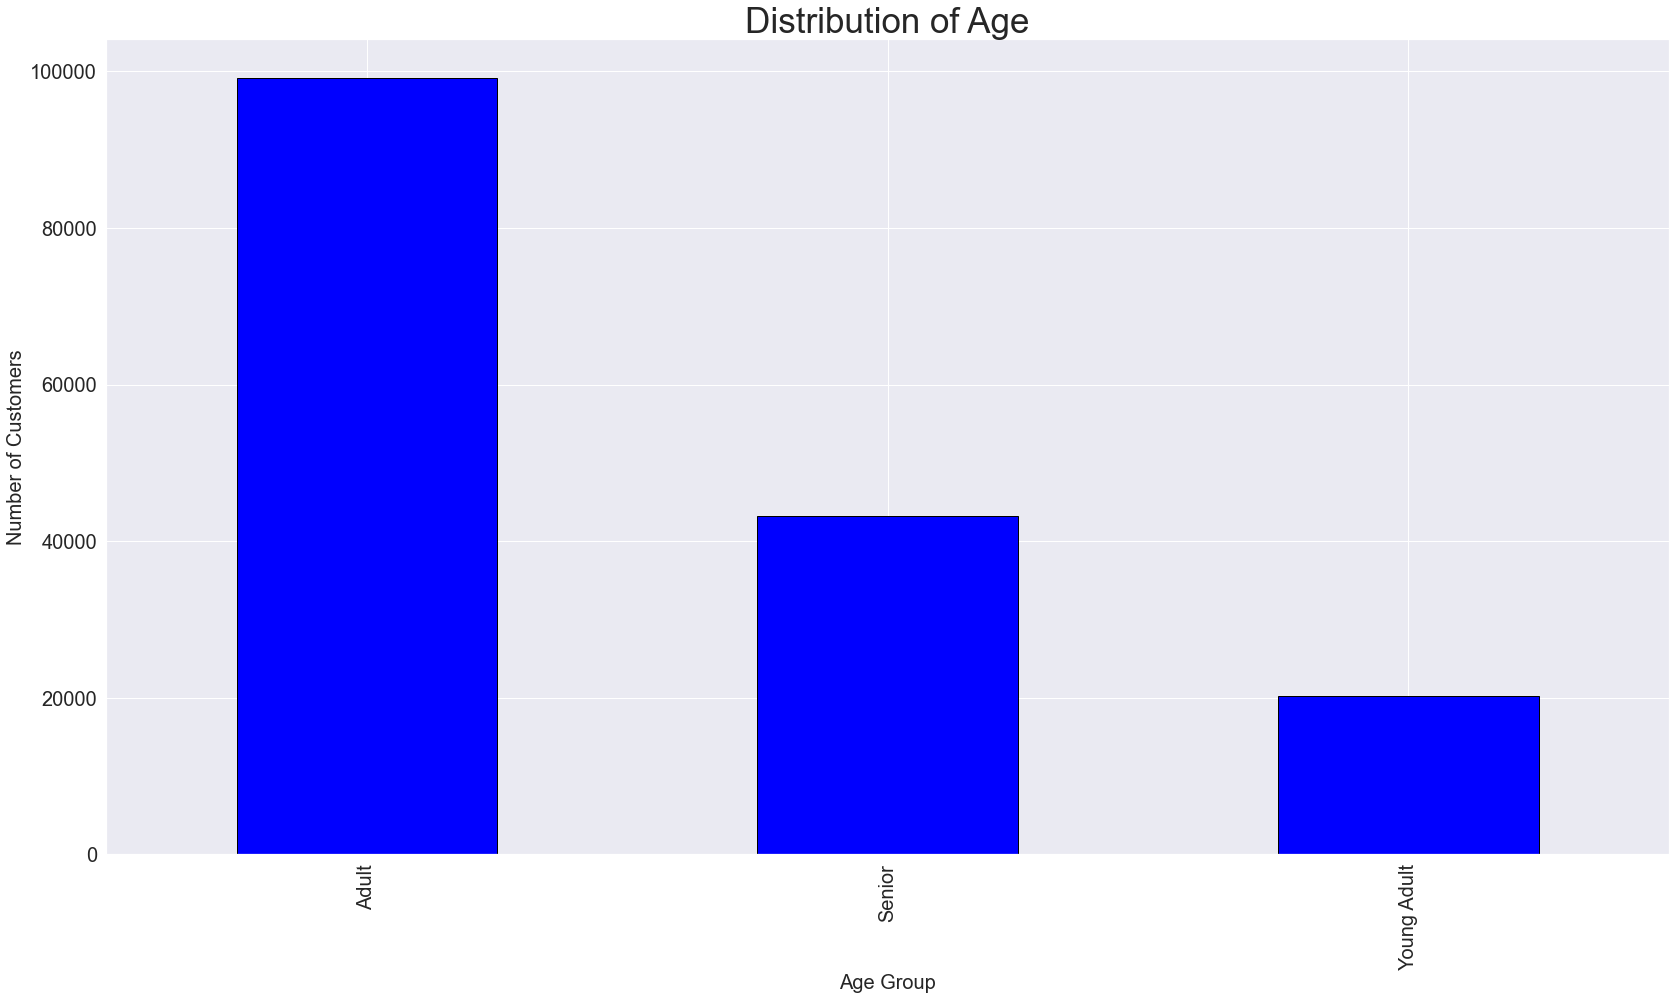

In [60]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Creating a bar chart for age distribution of customers
bar=df_unique['age_group'].value_counts().plot.bar(color='blue', edgecolor='black',fontsize=20)
plt.title('Distribution of Age', fontsize=35)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)

In [61]:
#exporting bar chart
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barchart_age_distribution.png'))

### Income Profile Visualizations

Text(0.5, 0, 'Number of Customers')

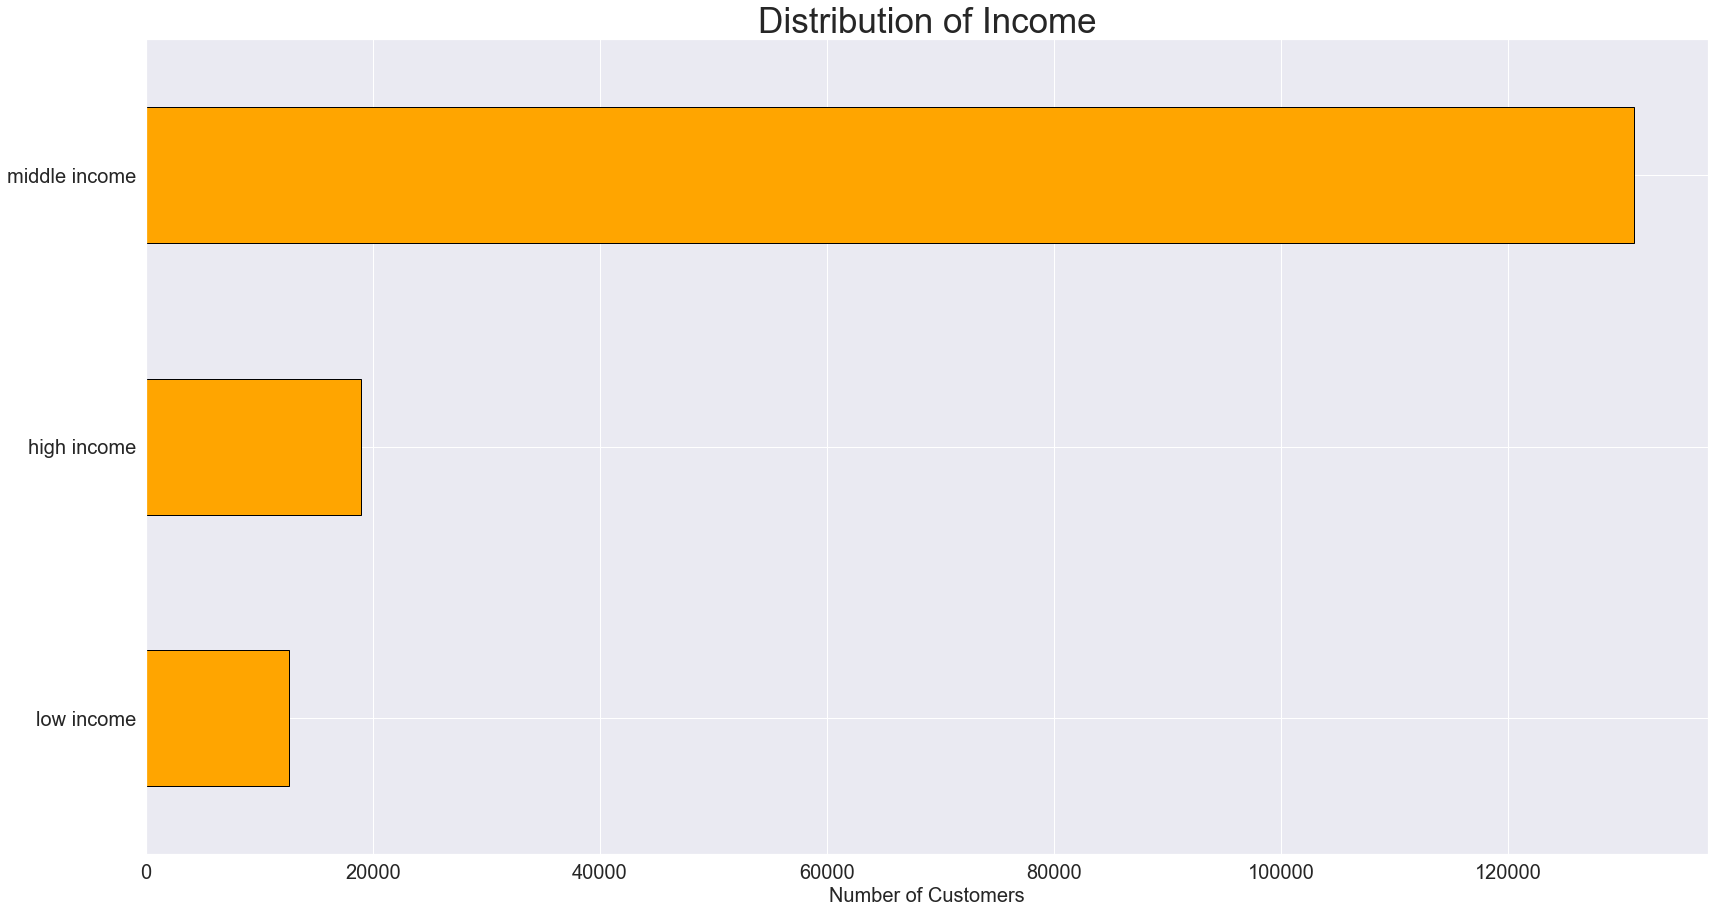

In [63]:
#Creating a horizontal bar chart
income_bar = df_unique['income_group'].value_counts().sort_values().plot.barh(color='orange', edgecolor='black',fontsize=20)
plt.title('Distribution of Income', fontsize=35)
plt.xlabel('Number of Customers', fontsize=20)

In [64]:
#Exporting bar chart
income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'horizontalbar_income_distribution.png'))

### Family Status and Dependent Profile Visualizations 

In [65]:
#Creating a crosstab for dependants and family status
depend = pd.crosstab(df_unique['family_status'], df_unique['dependent_group'])
depend

dependent_group,has dependents,no dependents
family_status,,
divorced/widowed,0,13831
living with parents and siblings,7608,0
married,114296,0
single,0,26896


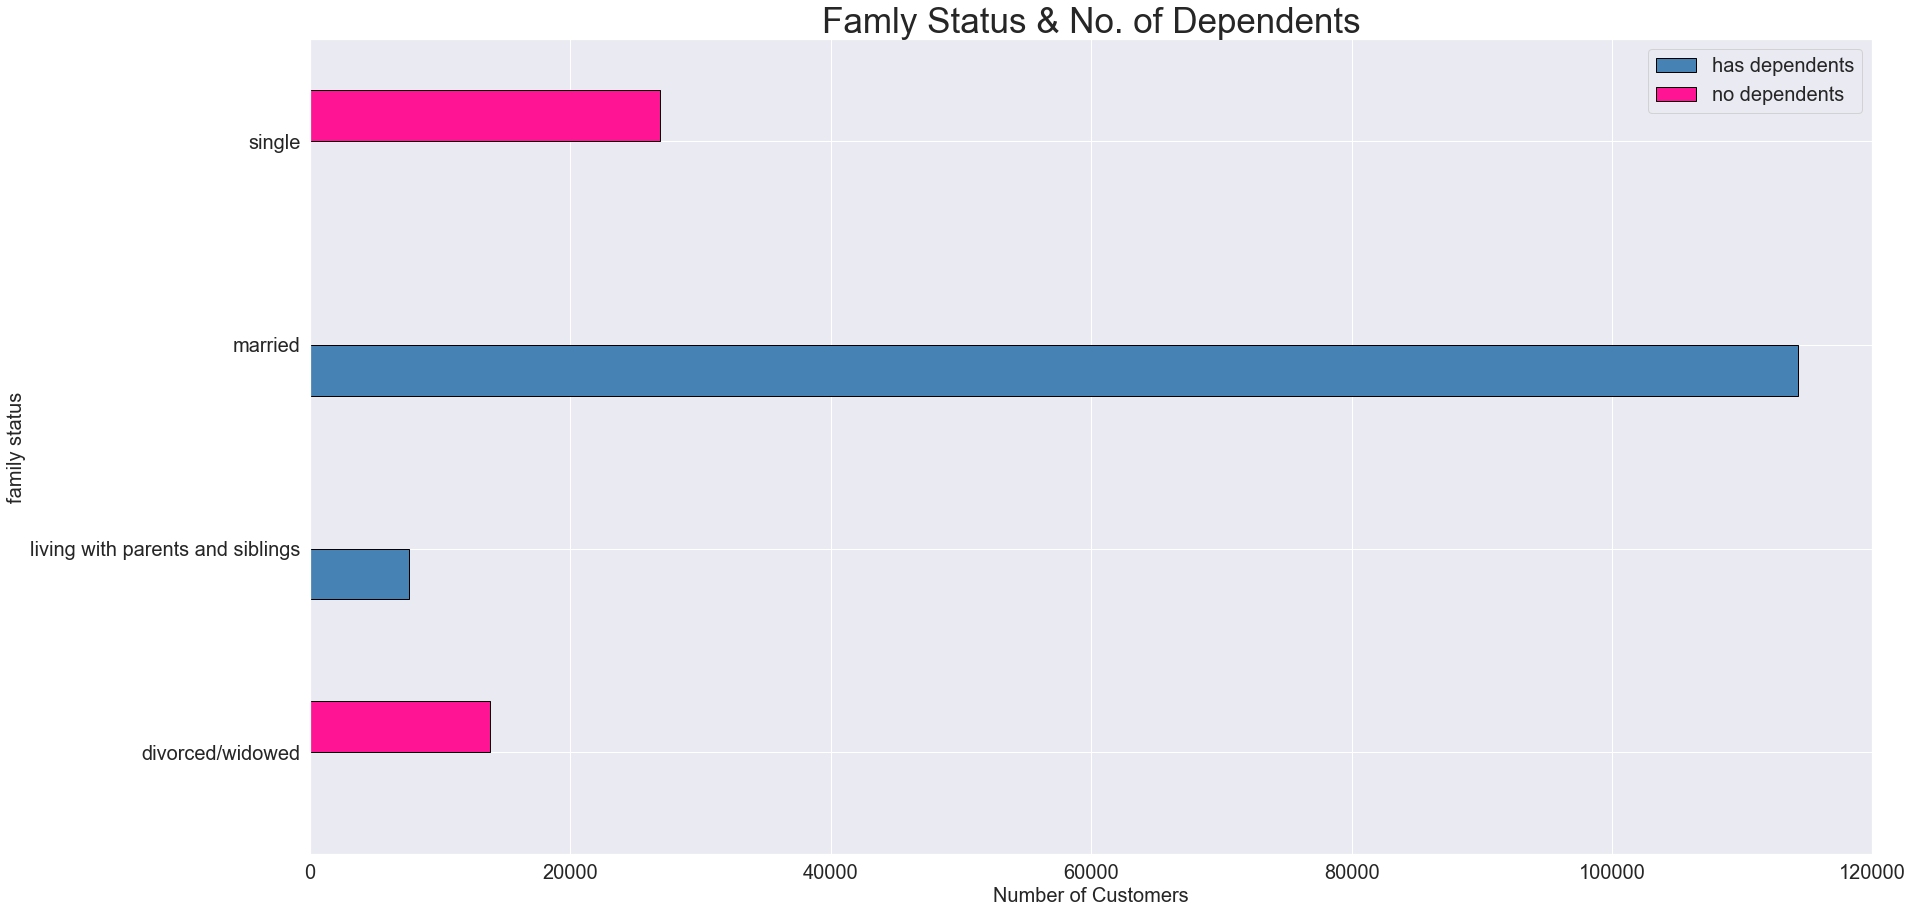

In [67]:
#Creating a horizontal bar chart
depend_bar = depend.plot.barh(color=['steelblue','deeppink'], edgecolor='black',fontsize=20)
plt.title('Famly Status & No. of Dependents', fontsize=35)
plt.xlabel('Number of Customers', fontsize=20)
plt.ylabel('family status', fontsize=20)
plt.legend(fontsize=20)

In [68]:
#Exporting bar chart
depend_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barchart_dependent_famstatus_distribution.png'))

### Baby Department Visualizations

In [69]:
#Checking Frequency: 0 = has not purchased baby supplies / 1 = has purchased baby supplies
df_unique['baby_status'].value_counts()

0    132401
1     30230
Name: baby_status, dtype: int64

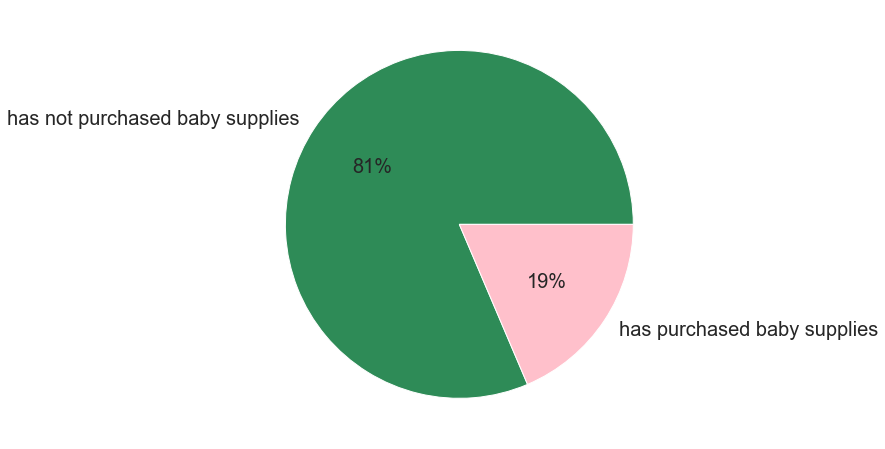

In [72]:
sns.set(rc = {'figure.figsize':(18,8)})

#Creating a pie chart for customers who have bought baby supplies
baby_pie = df_unique['baby_status'].value_counts().plot.pie(label ='', labels=['has not purchased baby supplies', 'has purchased baby supplies'],autopct=('%1.f%%'), colors=['seagreen','pink'], textprops={'fontsize': 20})

In [73]:
#Exporting pie chart
baby_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'baby_piechart.png'))

### Pet Department Profile Visualizations

In [75]:
#Checking Frequency 0 = not purchased pet supplies / 1 = has purchased pet supplies 
df_unique['pet_status'].value_counts()

0    149456
1     13175
Name: pet_status, dtype: int64

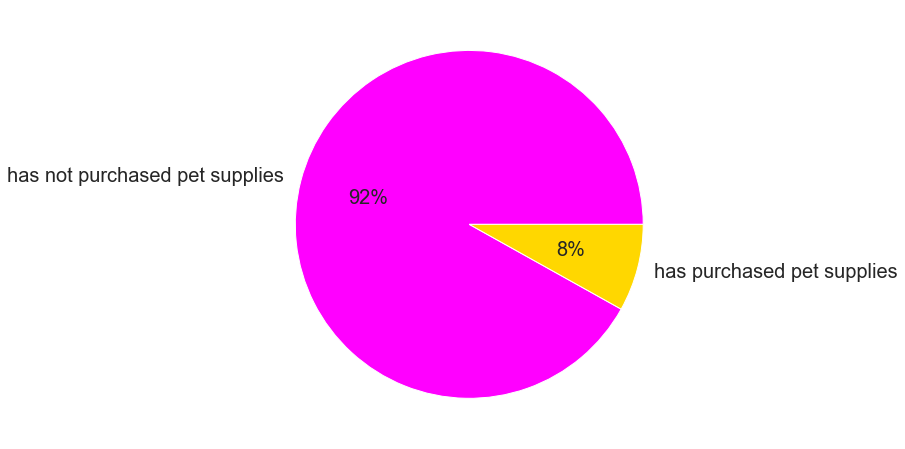

In [81]:
#Creating a pie chart for customers who have bought pet stuff
pet_pie=df_unique['pet_status'].value_counts().plot.pie(label='', labels=['has not purchased pet supplies', 'has purchased pet supplies'],autopct=('%1.f%%'), colors=['magenta','gold'], textprops={'fontsize': 20})

In [82]:
#Exporting pie chart
pet_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pet_piechart.png'))

### Alcohol Department Profile Visualizations

In [83]:
#Checking Frequency 0 = has not purchased alcohol / 1 = has purchased alcohol 
df_unique['alcohol_status'].value_counts()

0    149480
1     13151
Name: alcohol_status, dtype: int64

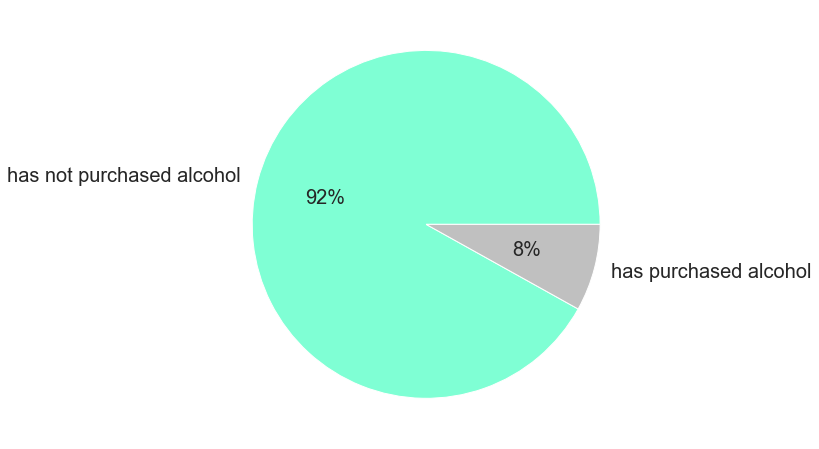

In [85]:
#Creating a pie chart for customers who have bought pet stuff
alcohol_pie=df_unique['alcohol_status'].value_counts().plot.pie(label='', labels=['has not purchased alcohol', 'has purchased alcohol'],autopct=('%1.f%%'), colors=['aquamarine','silver'], textprops={'fontsize': 20})

In [87]:
#Exporting pie chart
alcohol_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'alcohol_piechart.png'))

### Customer Profile Comparison Visualizations

6. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Region Distributions 

In [88]:
#Creating crosstab for region and age group
age_region = pd.crosstab(index = df_unique['region'], columns=df_unique['age_group'], normalize="index")
#creating cross tab to display labels
age_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['age_group'])

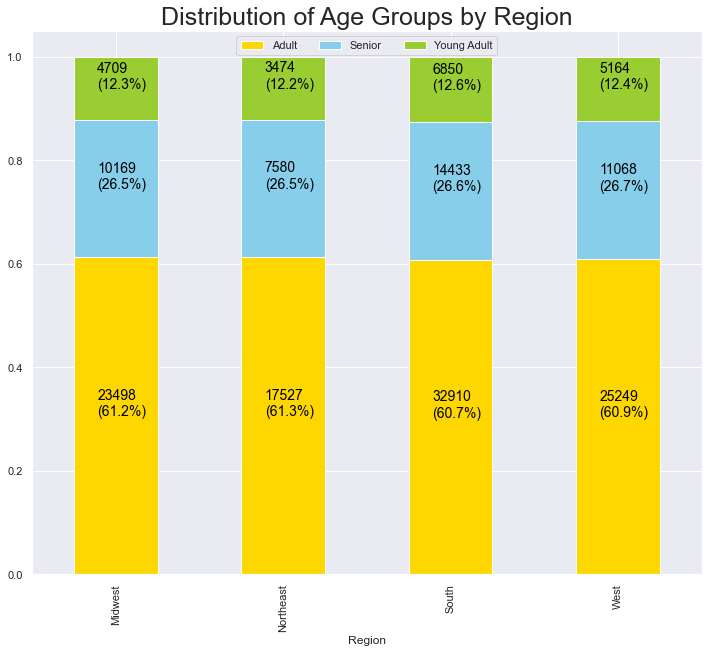

In [91]:
#Creating stacked bar chart for age_region distribution
age_region_dist=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['gold','skyblue','yellowgreen'], 
                        figsize=(12,10))

plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=14)

plt.show()

In [92]:
#Exporting stacked bar chart
age_region_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_region_stackedbar.png'))

In [93]:
#Creating crosstab for age group by region
age_region_bar=pd.crosstab(df_unique['region'], columns=df_unique['age_group'])
#creating cross tab to display labels
age_region_bar_labels=pd.crosstab(df_unique['region'],columns=df_unique['age_group'])

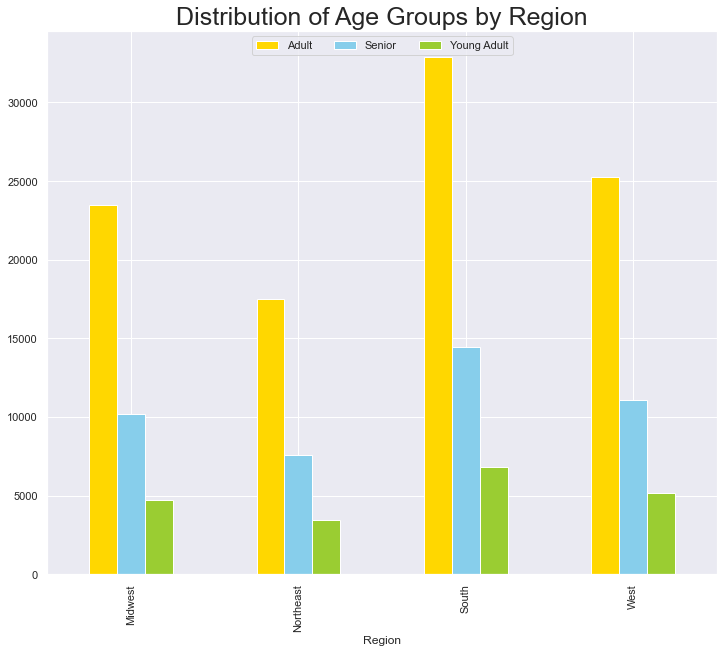

In [98]:
#Creating bar chart for age group by region
age_region_bar_dist=age_region_bar.plot(kind='bar', 
                        stacked=False, 
                        color=['gold','skyblue','yellowgreen'],
                        figsize=(12,10))
plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")
plt.show()

In [99]:
#Exporting bar chart
age_region_bar_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_region_barchart.png'))

In [100]:
#Creating crosstab for region and income group
income_region=pd.crosstab(index=df_unique['region'], columns=df_unique['income_group'], normalize="index")
#creating cross tab to display labels
income_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['income_group'])

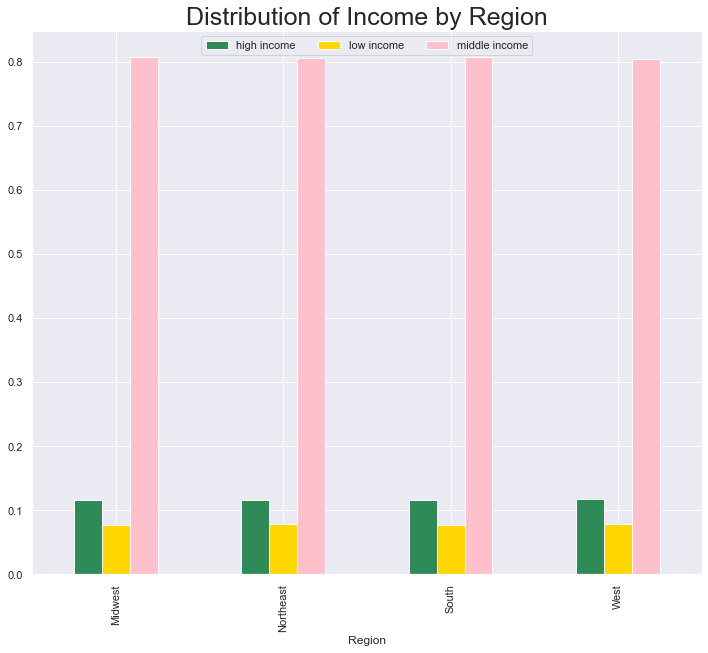

In [111]:
#creating bar chart for income by region
income_region_dist= income_region.plot(kind='bar', 
                        stacked=False, 
                        color=['seagreen','gold','pink'],
                        figsize=(12,10))
plt.title('Distribution of Income by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")
plt.show()

In [112]:
#Exporting stacked bar chart
income_region_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_region_barchart.png'))

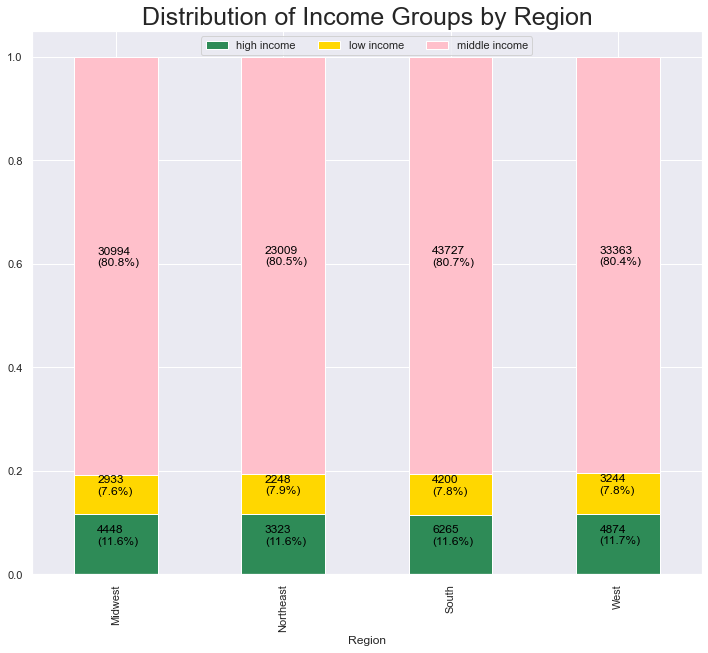

In [108]:
#Creating stacked bar chart for income_region distribution
income_region_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['seagreen','gold','pink'], 
                        figsize=(12,10))

plt.title('Distribution of Income Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [109]:
#Exporting stacked bar chart
income_region_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_region_stackedbar.png'))

In [113]:
#Creating crosstab for region and customer loyalty
loyalty_region=pd.crosstab(index=df_unique['region'], columns=df_unique['loyalty_flag'], normalize="index")
#creating cross tab to display labels
loyalty_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['loyalty_flag'])

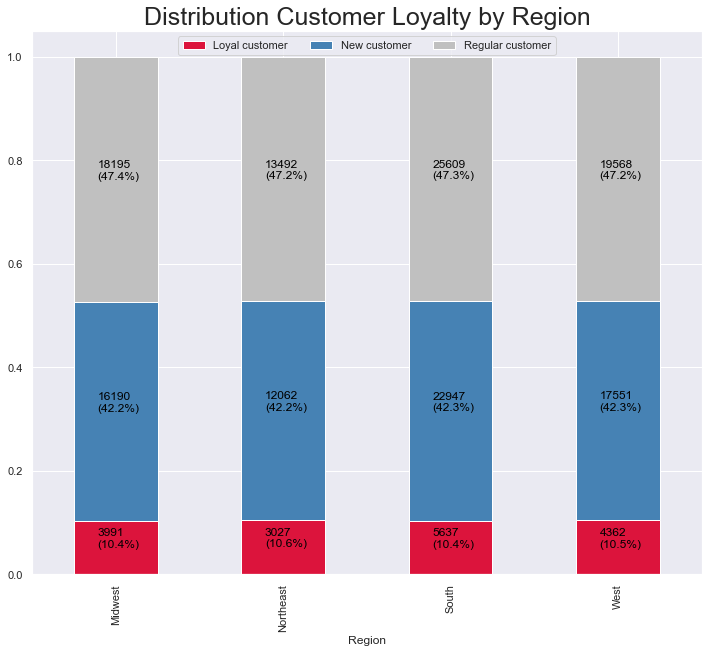

In [121]:
#Creating stacked bar chart for loyalty_region distribution
loyalty_region_dist=loyalty_region.plot(kind='bar', 
                        stacked=True, 
                        color=['crimson','steelblue','silver'], 
                        figsize=(12,10))

plt.title('Distribution Customer Loyalty by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*loyalty_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                         loyalty_region_labels.loc[y],
                                          loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [122]:
#Exporting stacked bar chart
loyalty_region_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_region_stacked.png'))

In [123]:
#Creating crosstab for region and product price range purchases
price_range_region=pd.crosstab(index=df_unique['region'], columns=df_unique['price_range_loc'], normalize="index")
#creating cross tab to display labels
price_range_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['price_range_loc'])

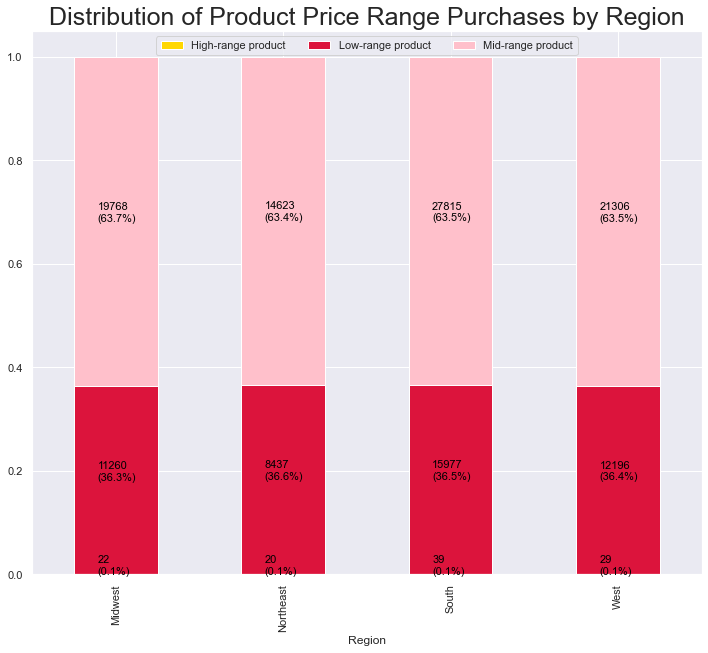

In [127]:
#Creating stacked bar chart for price_range_region distribution
price_range_region_dist=price_range_region.plot(kind='bar', 
                        stacked=True, 
                        color=['gold','crimson','pink'], 
                        figsize=(12,10))

plt.title('Distribution of Product Price Range Purchases by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*price_range_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_region.loc[y],
                                         price_range_region_labels.loc[y],
                                          price_range_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=11)

plt.show()

In [128]:
#Exporting stacked bar chart
price_range_region_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_range_region_stacked.png'))

In [129]:
#Creating crosstab for region and department
dept_region=pd.crosstab(index=df_unique['department'], columns=df_unique['region'], normalize="index")
#creating cross tab to display labels
dept_region_labels=pd.crosstab(index=df_unique['department'],columns=df_unique['region'])

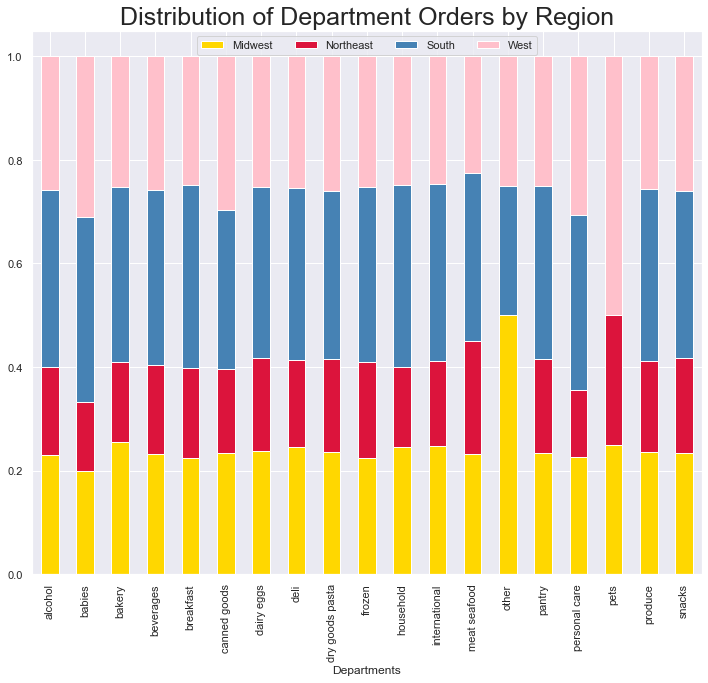

In [137]:
#creating stacked bar chart for dept_region distribution
dept_region_dist=dept_region.plot(kind='bar', 
                        stacked=True, 
                        color=['gold','crimson','steelblue','pink'], 
                        figsize=(12,10))

plt.title('Distribution of Department Orders by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Departments")

plt.show()

In [138]:
#Exporting stacked bar chart
dept_region_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_region_stacked.png'))

### Order Frequency Distributions 

In [139]:
#Creating crosstab for order frequency and income
income_frequency=pd.crosstab(index=df_unique['income_group'], columns=df_unique['frequency_flag'], normalize="index")
#creating cross tab to display labels
income_frequency_labels=pd.crosstab(index=df_unique['income_group'],columns=df_unique['frequency_flag'])

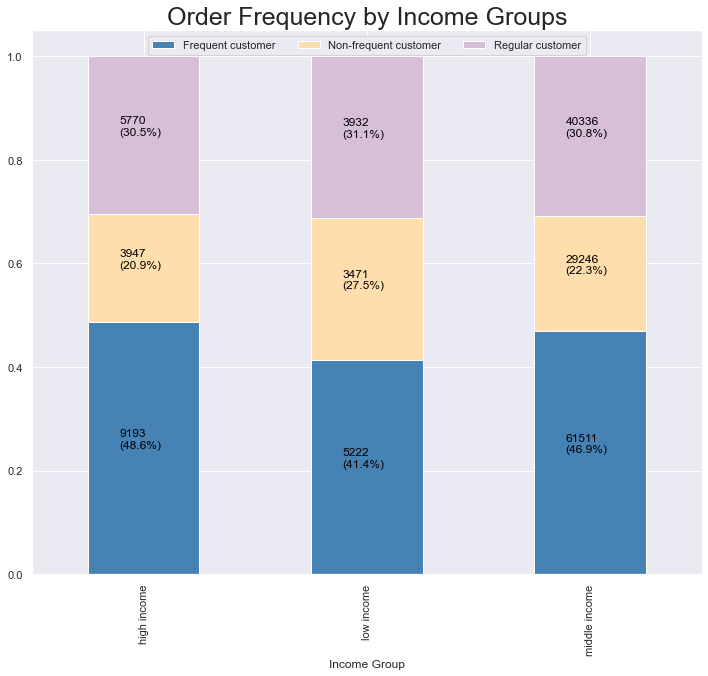

In [166]:
#Creating stacked bar chart for income & order frequency
income_frequency_dist=income_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['steelblue','navajowhite','thistle'], 
                        figsize=(12,10))

plt.title('Order Frequency by Income Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Income Group")


for n, y in enumerate([*income_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_frequency.loc[y],
                                         income_frequency_labels.loc[y],
                                          income_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [167]:
#Exporting stacked bar chart
income_frequency_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_frequency_stacked.png'))

In [142]:
#Creating crosstab for order frequency and age group
age_frequency=pd.crosstab(index=df_unique['age_group'], columns=df_unique['frequency_flag'], normalize="index")
#creating cross tab to display labels
age_frequency_labels=pd.crosstab(index=df_unique['age_group'],columns=df_unique['frequency_flag'])

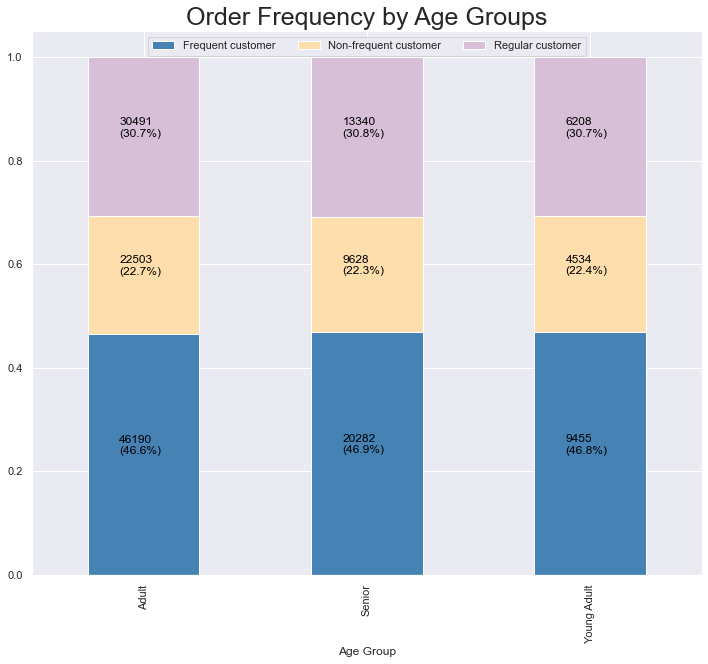

In [165]:
#Creating stacked bar chart for age & order frequency
age_frequency_dist=age_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['steelblue','navajowhite','thistle'], 
                        figsize=(12,10))

plt.title('Order Frequency by Age Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Age Group")


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_frequency.loc[y],
                                         age_frequency_labels.loc[y],
                                          age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [168]:
#Exporting stacked bar chart
age_frequency_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_frequency_stacked.png'))

In [146]:
#Creating crosstab for order frequency and family status
family_frequency=pd.crosstab(index=df_unique['family_status'], columns=df_unique['frequency_flag'], normalize="index")
#creating cross tab to display labels
family_frequency_labels=pd.crosstab(index=df_unique['family_status'],columns=df_unique['frequency_flag'])

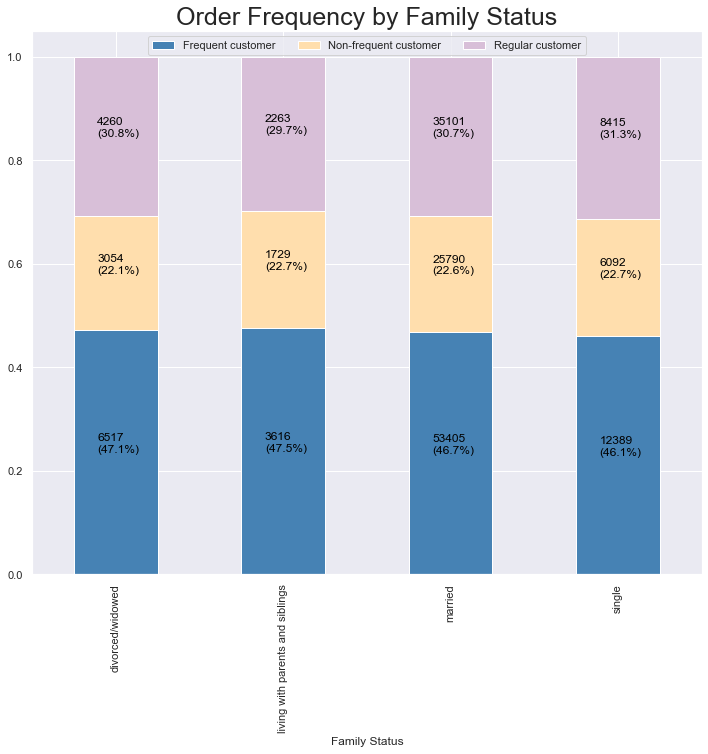

In [147]:
#Creating stacked bar chart for family status & order frequency
family_frequency_dist=family_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['steelblue','navajowhite','thistle'], 
                        figsize=(12,10))

plt.title('Order Frequency by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Family Status")


for n, y in enumerate([*family_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(family_frequency.loc[y],
                                         family_frequency_labels.loc[y],
                                          family_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [148]:
#Exporting family_frequency_dist
family_frequency_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_frequency_stacked.png'))

### Price Range Distributions 

In [149]:
#Creating crosstab for item price range and customer loyalty
price_range_loyalty=pd.crosstab(index=df_unique['price_range_loc'], columns=df_unique['loyalty_flag'], normalize="index")
#creating cross tab to display labels
price_range_loyalty_labels=pd.crosstab(index=df_unique['price_range_loc'],columns=df_unique['loyalty_flag'])

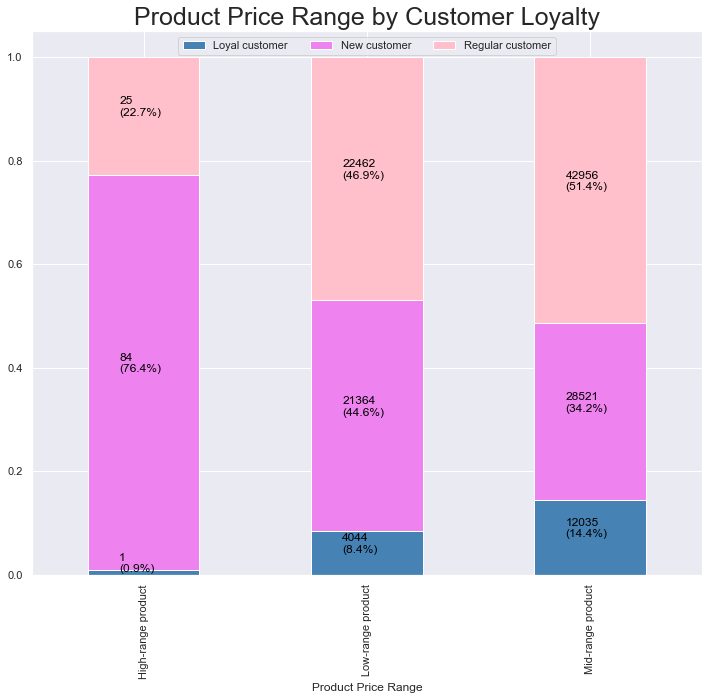

In [155]:
#Creating stacked bar chart for price range and customer loyalty
price_range_loyalty_dist=price_range_loyalty.plot(kind='bar', 
                        stacked=True, 
                        color=['steelblue','violet','pink'], 
                        figsize=(12,10))

plt.title('Product Price Range by Customer Loyalty', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Product Price Range")


for n, y in enumerate([*price_range_loyalty_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_loyalty.loc[y],
                                         price_range_loyalty_labels.loc[y],
                                          price_range_loyalty.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [156]:
#Exporting stacked bar chart
price_range_loyalty_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_range_loyalty_stacked.png'))

In [157]:
#Creating crosstab for prices and family status
family_prices=pd.crosstab(index=df_unique['family_status'], columns=df_unique['price_range_loc'], normalize="index")
#creating cross tab to display labels
family_prices_labels=pd.crosstab(index=df_unique['family_status'],columns=df_unique['price_range_loc'])

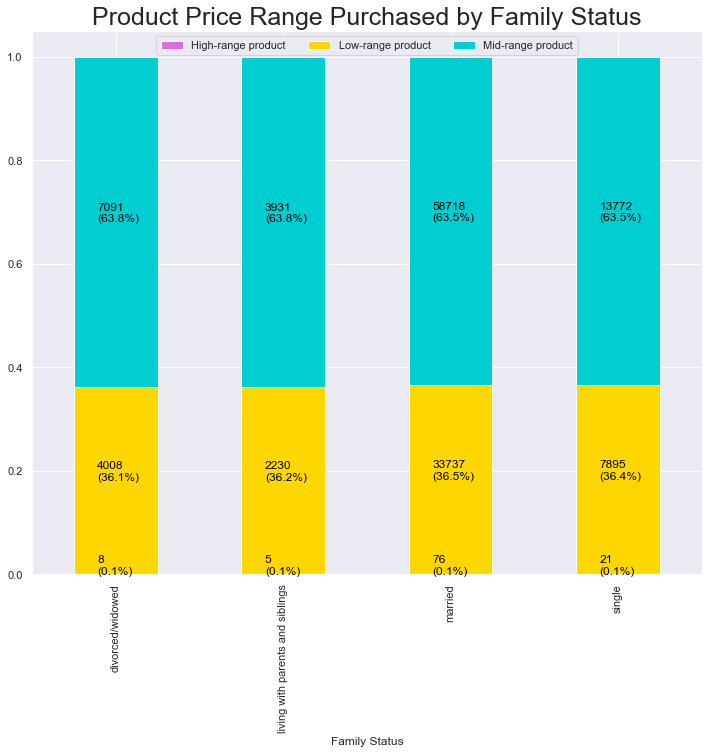

In [159]:
#Creating stacked bar chart for family status & prices
family_prices_dist=family_prices.plot(kind='bar', 
                        stacked=True, 
                        color=['orchid','gold','darkturquoise'], 
                        figsize=(12,10))

plt.title('Product Price Range Purchased by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Family Status")


for n, y in enumerate([*family_prices_labels.index.values]):
    for (proportion, count, x_loc) in zip(family_prices.loc[y],
                                         family_prices_labels.loc[y],
                                          family_prices.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [160]:
#Exporting family_frequency_dist
family_prices_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_prices_stacked.png'))

In [161]:
#Creating crosstab for prices and age_group
age_prices=pd.crosstab(index=df_unique['age_group'], columns=df_unique['price_range_loc'], normalize="index")
#creating cross tab to display labels
age_prices_labels=pd.crosstab(index=df_unique['age_group'],columns=df_unique['price_range_loc'])

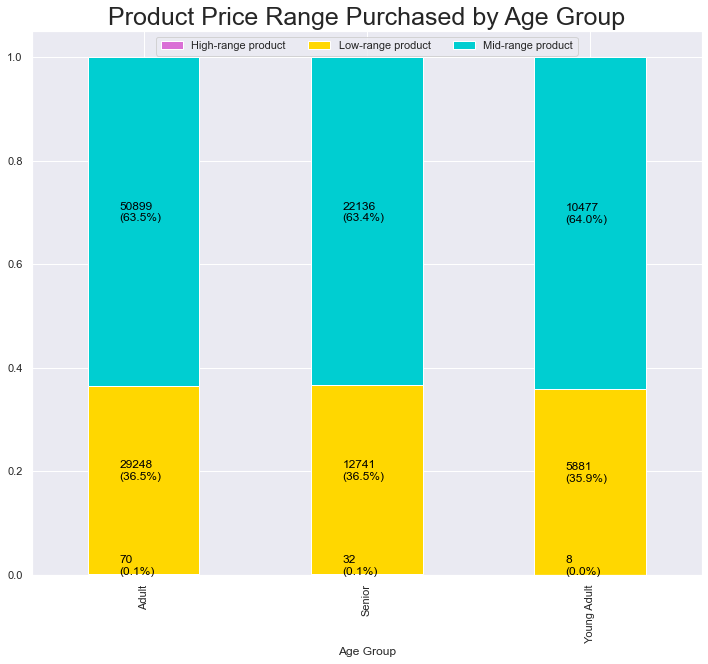

In [163]:
#Creating stacked bar chart for age_group & prices
age_prices_dist=age_prices.plot(kind='bar', 
                        stacked=True, 
                        color=['orchid','gold','darkturquoise'], 
                        figsize=(12,10))

plt.title('Product Price Range Purchased by Age Group', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Age Group")


for n, y in enumerate([*age_prices_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_prices.loc[y],
                                         age_prices_labels.loc[y],
                                          age_prices.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [164]:
#Exporting family_frequency_dist
age_prices_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_prices_stacked.png'))

### General Visualizations 

In [169]:
#Defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

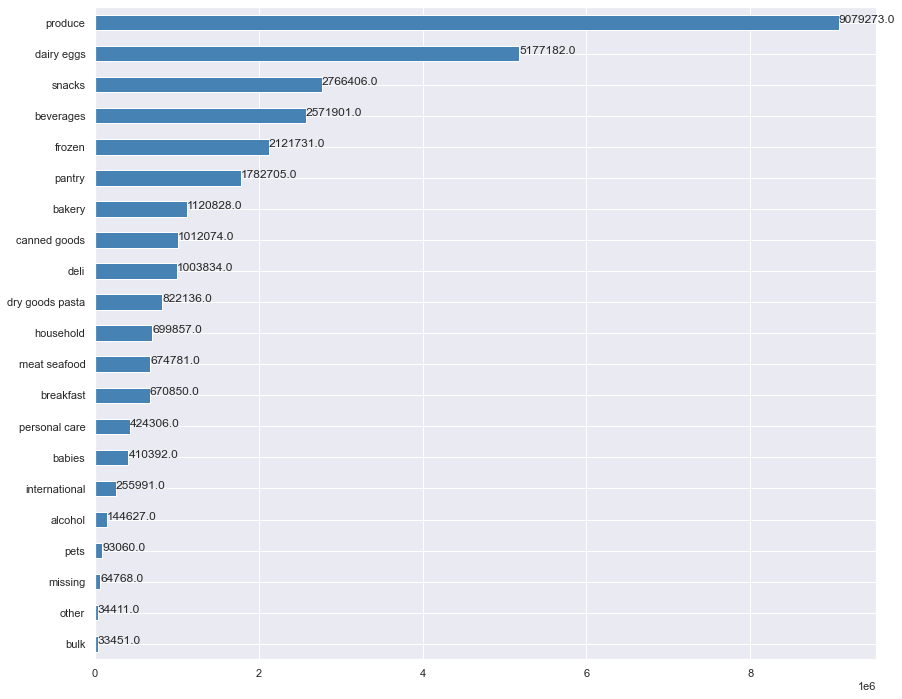

In [171]:
#Creating bar chart for orders made from each department
department_bar=df_active.department.value_counts().sort_values().plot(kind = 'barh',color=['steelblue'],figsize=[14,12])
show_values(department_bar, "h", space=0)

In [172]:
#Exporting horizontal bar chart
department_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'department_bar.png'))

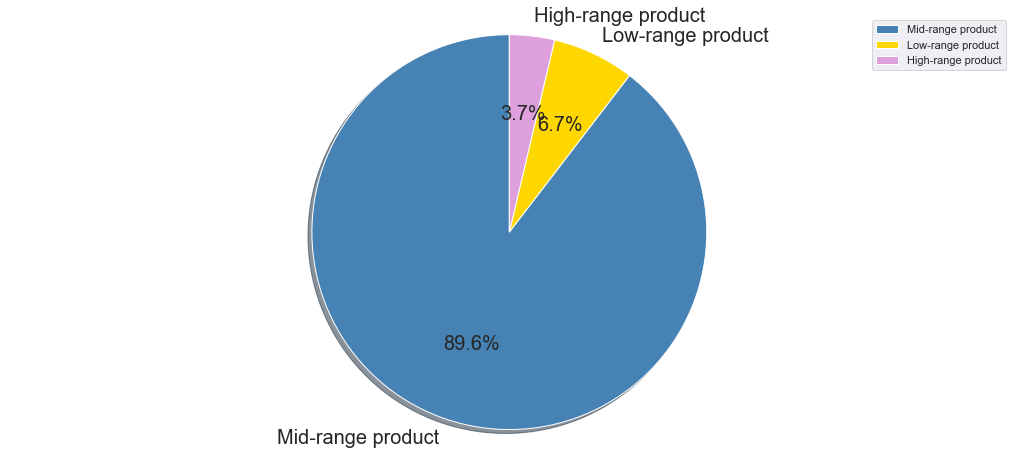

In [174]:
#Creating pie chart for price range distribution
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = df_active['price_range_loc'].value_counts()
colors = ['steelblue','gold','plum']
textprops = {"fontsize":20}

price_pie, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()

In [175]:
#Exporting price_pie
price_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_pie.png'))

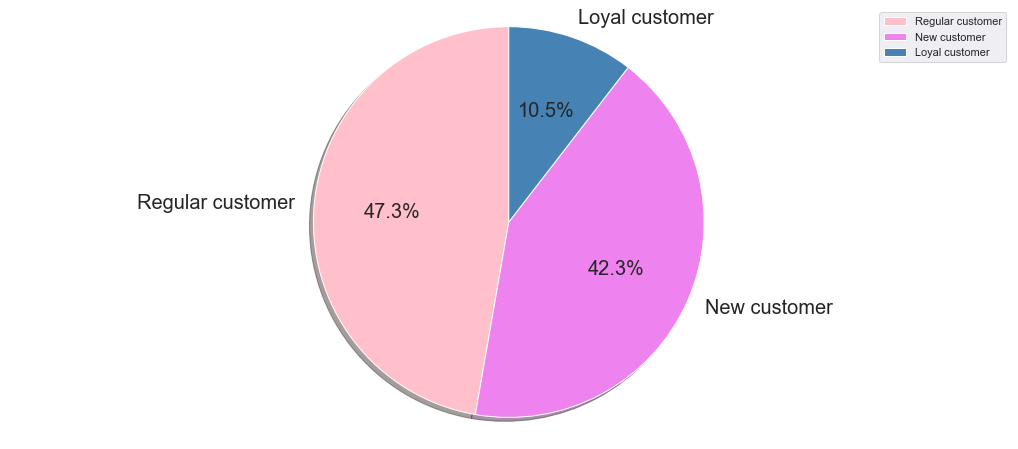

In [180]:
#Distribution of orders based on brand loyalty
labels = 'Regular customer', 'New customer', 'Loyal customer'
sizes = df_unique['loyalty_flag'].value_counts()
colors = ['pink','violet','steelblue']
textprops = {"fontsize":20}

loyalty_pie, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()

In [181]:
#Exporting loyalty_pie
loyalty_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_pie.png'))

In [182]:
df_unique['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

In [183]:
#Difference in spending habits among customers based on loyalty flag
df_active.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773438  1.0  25.0
New customer      7.800781  1.0  25.0
Regular customer  7.796875  1.0  25.0

In [184]:
#Difference in order frequency among customers based on loyalty flag
df_active.groupby(['loyalty_flag']).agg({'median_order_frequency':['mean', 'min', 'max']})

median_order_frequency           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 5.171875  0.0  14.0
New customer                  18.031250  0.0  30.0
Regular customer              10.609375  0.0  30.0

# Exporting Final Instacart Dataset

In [189]:
#exporting final dataset of active customers
df_active.to_pickle(os.path.join(path, 'Data','Prepared Data', 'complete_instacart_data_final.pkl'))

MemoryError: 

In [186]:
#exporting final dataset of unique customers
df_unique.to_pickle(os.path.join(path, 'Data','Prepared Data', 'unique_dataset_for_profiles.pkl'))